In [29]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd0de4fb2-cd53-46cb-931b-539f33c2872f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#Need to go into root file for jupyter and change data limit to retrieve all data

{'status': {'timestamp': '2023-12-13T19:01:08.208Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 8888}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10616, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [30]:
type(data)

dict

In [37]:
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.956896e+07,1.956896e+07,False,NaN,1,NaN,NaN,None,2023-12-13T19:00:00.000Z,42108.473009,2.248128e+10,-20.1471,0.000443,2.016210,-4.153380,14.553430,56.682231,58.294584,8.240189e+11,52.2066,8.842779e+11,None,2023-12-13T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:01:20.904552
1,1027,Ethereum,ETH,ethereum,8031,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202118e+08,1.202118e+08,True,NaN,2,NaN,NaN,None,2023-12-13T19:00:00.000Z,2217.535234,1.148340e+10,-5.3886,0.215364,1.317599,-2.424681,5.947521,42.650938,35.981439,2.665738e+11,16.8891,2.665738e+11,None,2023-12-13T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:01:20.904552
2,825,Tether USDt,USDT,tether,68018,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.065378e+10,9.360908e+10,True,NaN,3,NaN,NaN,None,2023-12-13T18:59:00.000Z,0.999806,4.650275e+10,-13.9415,0.018760,0.011416,-0.027529,-0.049829,-0.027915,-0.066077,9.063620e+10,5.7424,9.359093e+10,None,2023-12-13T18:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 19:01:20.904552
3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516962e+08,1.516962e+08,False,NaN,4,NaN,NaN,None,2023-12-13T18:59:00.000Z,250.665880,1.090134e+09,-20.9067,-0.508625,-1.412189,8.520781,2.122725,21.368454,18.174305,3.802505e+10,2.4101,3.802505e+10,None,2023-12-13T18:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:01:20.904552
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.395746e+10,9.998817e+10,False,NaN,5,NaN,NaN,None,2023-12-13T19:00:00.000Z,0.615967,1.415566e+09,-6.0141,0.261356,-0.106952,-1.952797,-5.158388,26.581010,25.655453,3.323599e+10,2.1057,6.159665e+10,None,2023-12-13T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:01:20.904552
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.274054e+08,5.647034e+08,True,NaN,6,NaN,NaN,None,2023-12-13T19:00:00.000Z,67.938825,2.006410e+09,-22.4542,0.482127,-0.360757,7.458886,25.840835,208.403424,258.669923,2.903742e+10,1.8397,3.836528e+10,None,2023-12-13T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:01:20.904552
6,3408,USDC,USDC,usd-coin,15513,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.410877e+10,2.410877e+10,False,NaN,7,NaN,NaN,None,2023-12-13T19:00:00.000Z,1.000245,5.968530e+09,-12.7727,-0.002915,-0.008941,0.018466,0.010524,0.011641,-0.006643,2.411468e+10,1.5285,2.411468e+10,None,2023-12-13T19:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 19:01:20.904552
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.532763e+10,3.643998e+10,False,NaN,8,NaN,NaN,None,2023-12-13T18:59:00.000Z,0.614631,1.362363e+09,4.6639,0.403851,5.955478,37.744604,68.172001,148.803453,145.162735,2.171346e+10,1.3757,2.765840e+10,None,2023-12-13T18:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:01:20.904552
8,5805,Avalanche,AVAX,avalanche,593,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p..."

In [48]:

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd0de4fb2-cd53-46cb-931b-539f33c2872f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#############
#This keeps it in a dataframe instead of a csv    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


##############################################    
#If wanting to write the info to a csv file 
#
#    df = pd.json_normalize(data['data'])
#    df['timestamp'] = pd.to_datetime('now')
#    df
#    
#    if not os.path.isfile(r'/Users/peter/API.csv'):
#        df.to_csv(r'/Users/peter/API.csv', header='column_names')
#    else:
#        df.to_csv(r'/Users/peter/API.csv', mode = 'a', header=False)
    
    
    

In [49]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(15) #sleep 
exit()

API runner completed
API runner completed


KeyboardInterrupt: 

In [47]:
#############################################
#If writing to a csv, then this is how to read it from that file
#
#dfcsv = pd.read_csv(r'/Users/peter/API.csv')
#dfcsv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.956896e+07,1.956896e+07,False,NaN,1,NaN,NaN,NaN,2023-12-13T19:18:00.000Z,42342.695521,2.307089e+10,-16.4482,0.432364,2.729839,-3.711296,15.143432,57.585298,59.038595,8.286023e+11,52.1083,8.891966e+11,NaN,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:20.120615
1,1,1027,Ethereum,ETH,ethereum,8031,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202118e+08,1.202118e+08,True,NaN,2,NaN,NaN,NaN,2023-12-13T19:18:00.000Z,2232.003538,1.172152e+10,-2.1073,0.611258,2.150094,-1.638030,6.720676,43.591862,36.770029,2.683131e+11,16.8734,2.683131e+11,NaN,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:20.120615
2,2,825,Tether USDt,USDT,tether,68018,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.065378e+10,9.360908e+10,True,NaN,3,NaN,NaN,NaN,2023-12-13T19:17:00.000Z,1.000237,4.724086e+10,-11.7298,0.052004,0.084111,0.012217,-0.019270,0.008152,-0.003471,9.067529e+10,5.7051,9.363129e+10,NaN,2023-12-13T19:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 19:19:20.120615
3,3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516962e+08,1.516962e+08,False,NaN,4,NaN,NaN,NaN,2023-12-13T19:17:00.000Z,252.304441,1.090768e+09,-20.5667,0.156346,-0.826718,9.193479,2.780983,22.186752,18.898412,3.827361e+10,2.4051,3.827361e+10,NaN,2023-12-13T19:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:20.120615
4,4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.395746e+10,9.998817e+10,False,NaN,5,NaN,NaN,NaN,2023-12-13T19:18:00.000Z,0.620387,1.423983e+09,-4.9135,0.678496,0.391689,-1.394465,-4.516758,27.538546,26.260409,3.347452e+10,2.1051,6.203872e+10,NaN,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:20.120615
5,5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.274054e+08,5.647034e+08,True,NaN,6,NaN,NaN,NaN,2023-12-13T19:18:00.000Z,68.966766,2.038008e+09,-20.0215,1.211798,1.696565,8.817736,27.540118,213.412620,263.850444,2.947677e+10,1.8537,3.894576e+10,NaN,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:20.120615
6,6,3408,USDC,USDC,usd-coin,15513,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.410877e+10,2.410877e+10,False,NaN,7,NaN,NaN,NaN,2023-12-13T19:18:00.000Z,1.000457,6.064782e+09,-10.3881,-0.016327,0.029304,0.035350,0.034909,0.026428,0.031560,2.411980e+10,1.5157,2.411980e+10,NaN,2023-12-13T19:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 19:19:20.120615
7,7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.532763e+10,3.643998e+10,False,NaN,8,NaN,NaN,NaN,2023-12-13T19:17:00.000Z,0.622295,1.378557e+09,6.4329,0.860536,7.435152,39.538771,69.839194,151.912655,147.854803,2.198422e+10,1.3832,2.800329e+10,NaN,2023-12-13T19:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:20.120615
8,8,5805,Avalanche,AVAX,avalanche,593,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-ca

In [52]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19568956.00000,19568956.00000,False,NaN,1,NaN,NaN,None,2023-12-13T19:18:00.000Z,42342.69552,23070893880.83186,-16.44820,0.43236,2.72984,-3.71130,15.14343,57.58530,59.03859,828602345572.71460,52.10830,889196605941.93005,None,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:35.584519
1,1027,Ethereum,ETH,ethereum,8031,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120211761.82614,120211761.82614,True,NaN,2,NaN,NaN,None,2023-12-13T19:18:00.000Z,2232.00354,11721518558.85316,-2.10730,0.61126,2.15009,-1.63803,6.72068,43.59186,36.77003,268313077646.89294,16.87340,268313077646.89001,None,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:35.584519
2,825,Tether USDt,USDT,tether,68018,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90653779562.34685,93609080552.59224,True,NaN,3,NaN,NaN,None,2023-12-13T19:17:00.000Z,1.00024,47240855669.21067,-11.72980,0.05200,0.08411,0.01222,-0.01927,0.00815,-0.00347,90675287599.26476,5.70510,93631289748.61000,None,2023-12-13T19:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 19:19:35.584519
3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696153.31850,151696153.31850,False,NaN,4,NaN,NaN,None,2023-12-13T19:17:00.000Z,252.30444,1090768201.02840,-20.56670,0.15635,-0.82672,9.19348,2.78098,22.18675,18.89841,38273613173.65572,2.40510,38273613173.66000,None,2023-12-13T19:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:35.584519
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,None,2023-12-13T19:18:00.000Z,0.62039,1423983398.94627,-4.91350,0.67850,0.39169,-1.39447,-4.51676,27.53855,26.26041,33474519526.20613,2.10510,62038722820.48000,None,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:35.584519
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427405364.73195,564703363.19027,True,NaN,6,NaN,NaN,None,2023-12-13T19:18:00.000Z,68.96677,2038008105.91002,-20.02150,1.21180,1.69656,8.81774,27.54012,213.41262,263.85044,29476765617.39010,1.85370,38945764498.18000,None,2023-12-13T19:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 19:19:35.584519
6,3408,USDC,USDC,usd-coin,15513,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24108766762.72789,24108766762.72789,False,NaN,7,NaN,NaN,None,2023-12-13T19:18:00.000Z,1.00046,6064781600.53005,-10.38810,-0.01633,0.02930,0.03535,0.03491,0.02643,0.03156,24119796405.95254,1.51570,24119796405.95000,None,2023-12-13T19:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 19:19:35.584519
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35327631097.79600,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-13T19:17:00.000Z,0.62230,1378556652.15156,6.43290,0.86054,7.43515,39.53877,69.83919,151.91266,147.85480,21984221766.79497,1.38320,28003292288.89000,None,2023-12-13T19:17:00.000Z,NaN,

In [54]:

dfgroup = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
dfgroup


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.64456,3.05210,-3.60958,15.21326,57.67902,59.14448
Ethereum,0.81503,2.37636,-1.51697,6.62156,43.59157,36.80269
Tether USDt,0.03967,0.05779,-0.01062,-0.02352,0.00308,-0.01640
BNB,0.11701,-0.81095,9.12085,2.69003,22.01547,18.74989
XRP,0.81813,0.58926,-1.24909,-4.41997,27.73061,26.38185
Solana,1.21397,1.81981,8.54513,27.39434,212.61362,263.12867
USDC,-0.01131,0.01844,0.02527,0.02679,0.01459,-0.00192
Cardano,0.98280,7.88143,39.57326,69.83181,151.84616,147.86581
Avalanche,2.25492,6.22151,45.86037,131.72583,332.66214,323.75344


In [55]:
dfstack = dfgroup.stack()
dfstack

name                                     
Bitcoin      quote.USD.percent_change_1h      0.64456
             quote.USD.percent_change_24h     3.05210
             quote.USD.percent_change_7d     -3.60958
             quote.USD.percent_change_30d    15.21326
             quote.USD.percent_change_60d    57.67902
             quote.USD.percent_change_90d    59.14448
Ethereum     quote.USD.percent_change_1h      0.81503
             quote.USD.percent_change_24h     2.37636
             quote.USD.percent_change_7d     -1.51697
             quote.USD.percent_change_30d     6.62156
             quote.USD.percent_change_60d    43.59157
             quote.USD.percent_change_90d    36.80269
Tether USDt  quote.USD.percent_change_1h      0.03967
             quote.USD.percent_change_24h     0.05779
             quote.USD.percent_change_7d     -0.01062
             quote.USD.percent_change_30d    -0.02352
             quote.USD.percent_change_60d     0.00308
             quote.USD.percent_change_90

In [56]:
type(dfgroup)

pandas.core.frame.DataFrame

In [57]:
type(dfstack)

pandas.core.series.Series

In [58]:
df5 = dfstack.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.64456
            quote.USD.percent_change_24h   3.05210
            quote.USD.percent_change_7d   -3.60958
            quote.USD.percent_change_30d  15.21326
            quote.USD.percent_change_60d  57.67902
            quote.USD.percent_change_90d  59.14448
Ethereum    quote.USD.percent_change_1h    0.81503
            quote.USD.percent_change_24h   2.37636
            quote.USD.percent_change_7d   -1.51697
            quote.USD.percent_change_30d   6.62156
            quote.USD.percent_change_60d  43.59157
            quote.USD.percent_change_90d  36.80269
Tether USDt quote.USD.percent_change_1h    0.03967
            quote.USD.percent_change_24h   0.05779
            quote.USD.percent_change_7d   -0.01062
            quote.USD.percent_change_30d  -0.02352
            quote.USD.percent_change_60d   0.00308
            quote.USD.percent_change_90d  -0.01640
BNB         quote.USD.percent_change_1h    0.11701
            quote.USD.percent_change_24h  -0.81095
            quote.USD.percent_change_7d    9.12085
            quote.USD.percent_change_30d   2.69003
            quote.USD.percent_change_60d  22.01547
            quote.USD.percent_change_90d  18.74989
XRP         quote.USD.percent_change_1h    0.81813
            quote.USD.percent_change_24h   0.58926
            quote.USD.percent_change_7d   -1.24909
            quote.USD.percent_change_30d  -4.41997
            quote.USD.percent_change_60d  27.73061
            quote.USD.percent_change_90d  26.38185
Solana      quote.USD.percent_change_1h    1.21397
            quote.USD.percent_change_24h   1.81981
            quote.USD.percent_change_7d    8.54513
            quote.USD.percent_change_30d  27.39434
            quote.USD.percent_change_60d 212.61362
            quote.USD.percent_change_90d 263.12867
USDC        quote.USD.percent_change_1h   -0.01131
            quote.USD.percent_change_24h   0.01844
            quote.USD.percent_change_7d    0.02527
            quote.USD.percent_change_30d   0.02679
            quote.USD.percent_change_60d   0.01459
            quote.USD.percent_change_90d  -0.00192
Cardano     quote.USD.percent_change_1h    0.98280
            quote.USD.percent_change_24h   7.88143
            quote.USD.percent_change_7d   39.57326
            quote.USD.percent_change_30d  69.83181
            quote.USD.percent_change_60d 151.84616
            quote.USD.percent_change_90d 147.86581
Avalanche   quote.USD.percent_change_1h    2.25492
            quote.USD.percent_change_24h   6.22151
            quote.USD.percent_change_7d   45.86037
            quote.USD.percent_change_30d 131.72583
            quote.USD.percent_change_60d 332.66214
            quote.USD.percent_change_90d 323.75344
Dogecoin    quote.USD.percent_change_1h    0.91287
            quote.USD.percent_change_24h   1.18975
            quote.USD.percent_change_7d   -4.74541
            quote.USD.percent_change_30d  23.52096
            quote.USD.percent_change_60d  58.31410
            quote.USD.percent_change_90d  51.44631
TRON        quote.USD.percent_change_1h    0.24613
            quote.USD.percent_change_24h   0.00122
            quote.USD.percent_change_7d   -1.68247
            quote.USD.percent_change_30d  -5.37034
            quote.USD.percent_change_60d  21.40806
            quote.USD.percent_change_90d  24.32775
Polkadot    quote.USD.percent_change_1h    1.26613
            quote.USD.percent_change_24h   0.08806
            quote.USD.percent_change_7d   16.77280
            quote.USD.percent_change_30d  29.46816
            quote.USD.percent_change_60d  90.54236
            quote.USD.percent_change_90d  75.64707
Polygon     quote.USD.percent_change_1h    1.28461
            quote.USD.percent_change_24h   1.27934
            quote.USD.percent_change_7d    5.09811
            quote.USD.percent_change_30d  -3.31486
            quote.USD.percent_change_60d  69.76025
            quo

In [59]:
type(df5)

pandas.core.frame.DataFrame

In [96]:

df6 = df5.reset_index()

In [97]:
df6 = df6.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.64456
1,Bitcoin,quote.USD.percent_change_24h,3.05210
2,Bitcoin,quote.USD.percent_change_7d,-3.60958
3,Bitcoin,quote.USD.percent_change_30d,15.21326
4,Bitcoin,quote.USD.percent_change_60d,57.67902
5,Bitcoin,quote.USD.percent_change_90d,59.14448
6,Ethereum,quote.USD.percent_change_1h,0.81503
7,Ethereum,quote.USD.percent_change_24h,2.37636
8,Ethereum,quote.USD.percent_change_7d,-1.51697
9,Ethereum,quote.USD.percent_change_30d,6.62156


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt


In [99]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.64456
1,Bitcoin,24h,3.05210
2,Bitcoin,7d,-3.60958
3,Bitcoin,30d,15.21326
4,Bitcoin,60d,57.67902
5,Bitcoin,90d,59.14448
6,Ethereum,1h,0.81503
7,Ethereum,24h,2.37636
8,Ethereum,7d,-1.51697
9,Ethereum,30d,6.62156


/Users/peter/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


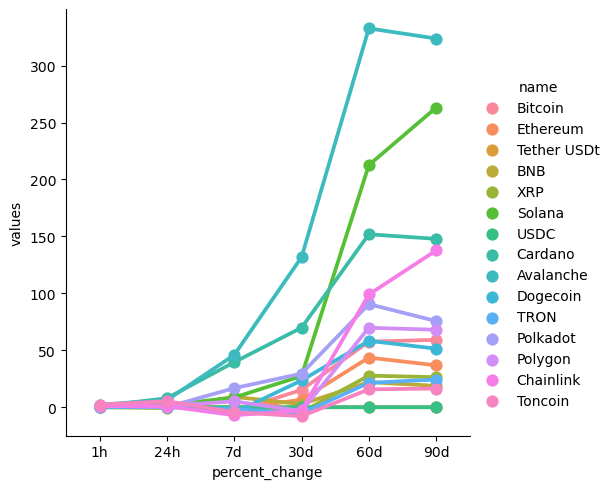

In [100]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind ='point')

In [104]:
df7 = df[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name == 'Bitcoin' ")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,42342.69552,2023-12-13 19:19:35.584519
0,Bitcoin,42393.77762,2023-12-13 19:24:49.441893
0,Bitcoin,42393.77762,2023-12-13 19:25:04.904887


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

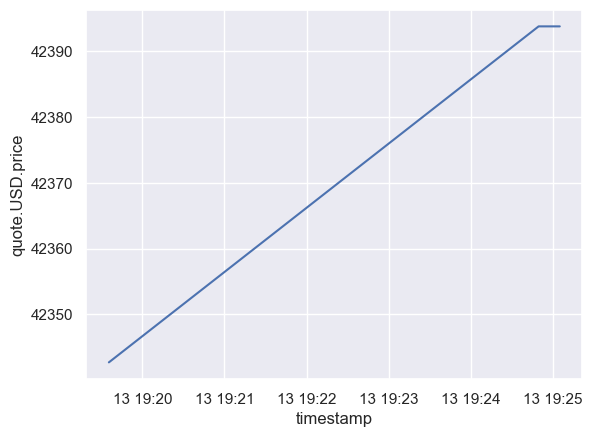

In [106]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df7)